In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

**Defining Class FEMTO which contains the logic for both energy minimized sub algorithm and task offloading algorithm**

In [ ]:
class FEMTO:

    def __init__(self,L):
        self.W = L[0]
        self.N = L[1]
        self.l = L[2]
        self.dmax = L[3]
        self.pmax = L[4]
        self.nt = L[5]
        self.ft = L[6]
        self.thetat = L[7] 
        self.gamma = L[8]
        self.beta = L[9]
        self.alpha = L[10] 
        self.N0 = L[11]
        self.E_avg = L[12]
        self.n = L[13]
        self.f = L[14]
        self.theta = L[15]
        self.I = L[16]
        self.p = L[17]
        self.lambda_ = L[18]
        self.m = L[19]
        self.fl = L[20]

    def B(self,i):
        return math.log2(1+((self.p[i]*self.gamma*self.beta)/(self.I[i]+ self.W*self.N0)))
    
    def funP(self,pi,i):
        return (self.W*self.B(i)*self.n[i])+self.f[i]+(self.f[i]*(self.n[i]*self.theta[i]-self.nt*self.thetat)*self.W*((self.gamma*self.beta)/(math.log(2)*(self.I[i] + self.W*self.N0 + pi*self.gamma*self.beta))))
    
    def bisection(self,a,b,threshold,i):
        res_a = self.funP(a,i)
        res_b = self.funP(b,i)

        if(res_a*res_b >= 0):
            print(res_a," ",res_b," Choose correct a and b")
            return 0
        res_t = 0
        while(abs(a - b) >= threshold):
            print(a," ",b)
            t = (a+b)/2
            res_t = self.funP(t,i)
            if(res_t == 0.0):
                break
            if res_t*res_a < 0:
                b = t
                res_b = res_t
            else:
                a = t
                res_a = res_t
        return res_t

    def energyMinimizedSubAlgo(self,i):
        res = 1
        p = 0
        l = 0

        # x = (self.l*self.nt)
        # y =  self.dmax*self.ft
        # print(x,y)
        p1 = (pow(2,1/(self.W*(((self.dmax*self.nt)/(l*self.nt - self.dmax*self.ft))-(self.n[i]/self.f[i]))) ) - 1 ) * ((self.I[i]+self.W*self.N0)/(self.gamma*self.beta))
        
        if (p1>self.pmax) or ((self.l/self.dmax) > (self.ft/self.nt)+(self.f[i]/self.n[i])):
            return 0,p,l
        else :
            x = ((self.W*self.gamma*self.beta*(self.n[i]*self.theta[i] - self.nt*self.thetat)))
            y = (((self.I[i]+self.W*self.N0)*math.log(2)))
            
            if (1+(x/y)) >= 0:
                p = max(0,p1)
            else :
                p2 = float('inf')
                if((self.l/self.dmax)<=(self.f[i]/self.n[i])):
                    p2 = (pow(2,1/(self.W*((self.dmax/self.l)-(self.n[i]/self.f[i]))) ) - 1 ) * ((self.I[i]+self.W*self.N0)/(self.gamma*self.beta))
                    p3 = self.bisection(0,self.pmax,0.001,i)
                    while p3 == 0:
                        a = np.random.rand(0,int(self.pmax))
                        b = np.random.rand(0,int(self.pmax))
                        p3 = self.bisection(a,b,0.001,i)
                p = min(min(pmax,p2),max(p1,p3))
            
            x = (p*self.gamma*self.beta)/(self.I[i]+self.W*self.N0)
            l = self.dmax/((1/self.W*math.log2(1+x))+(self.n[i]/self.f[i]))
        self.p[0] = p
        return res,l,p
    
    def offloadingAlgo(self):
        C = []
        T = []
        S = []
        M = []

        if len(C) == 0 :
            print(" No available idle FNs at this moment. ")
        else :
            for i in C:
                #check fesibility
                res,self.p[i],self.fl[i] = self.energyMinimizedSubAlgo(i)
                if res == 1 : #if feasible perform the following algorithm
                    # calculate energy consumption 
                    E_cur = (self.l*self.nt*self.thetat) + self.dmax*self.f[i]*((self.p[i] + ((self.n[i]*self.theta[i] - self.nt-self.thetat)*self.W*self.B(i)))/(self.f[i] + (self.W*self.n[i]*self.B(i))))
                    # calculate fairness metric
                    self.m[i] = self.lamda_[i]/(self.E_avg[i-1]*E_cur)
                    # update T,S,M ( node number, optimal parameters, fairness metric )
                    T.append(i)
                    S.append((self.p[i],self.fl[i]))
                    M.append(self.m[i])
            
            # if set T is empty, there is no feasible fog node 
            if len(T) == 0 :
                print(" No feasible task offloading services at this moment. ")
            else :
                #selct node with highest fairness metric and update historic energy consumption
                index = M.index()
                E_cur = (self.l*self.nt*self.thetat) + self.dmax*self.f[index]*((S[index][0] + ((self.n[index]*self.theta[index] - self.nt-self.thetat)*self.W*self.B(index)))/(self.f[index] + (self.W*self.n[index]*self.B(i))))
                self.E_avg[index] = (1- alpha) * self.E_avg[index] + (self.alpha * E_cur)
                return self.T[index],self.S[index] # return fog node index and solution parameters

**Testing optimal offloading algorithm for custom input**

In [ ]:
# W,N,l,dmax,pmax,nt,ft,thetat,gamma,beta,alpha,N0,E_avg,ni,fi,thetai,    Ii, p, lambda, m, fl
# 0,1,2,3,   4,   5,  6,7,     8,    9,   10,  11, 12,   13,14,    15,    16, 17, 18,    19, 20
l = [10000000.0, 1.0, 16000000.0, 10.0, 1.0, 1000.0, 2000000000.0, 5e-10, 2.12, -0.165, 0.002, -0.21798, [0.0], [1853.077061601279], [5000000000.0], [1e-10], [-0.05418], [0.0], [1.0], [0.0], [0.0]]
v = FEMTO(l)
res,li,p = v.energyMinimizedSubAlgo(0)
print("Optimal task size : ",li,"\nOptimal tranmission power from TN to FN : ", p)
x = (l[2]*l[5]*l[7])
# print(x)
E_cur = x + l[3]*l[14][0]*((p + ((l[13][0]*l[15][0] - l[5]-l[7])*l[0]*v.B(0)))/(l[14][0] + (l[0]*l[13][0]*v.B(0))))
print("Overall energy consumption for offloading to given fog node: ",E_cur)

Optimal task size :  26982148.252806094 
Optimal tranmission power from TN to FN :  0
Overall energy consumption for offloading to given fog node:  8.0


**Code to generate test data for tesing optimal offloading algorithm**

In [ ]:
#Graph - 1
file1 = open('testParse.txt', 'w')
W = 10000000
N = 1
dmax = 10
pmax = 1
nt = 1000
ft = 2000000000
thetat = 0.0000000005
gamma = 2.12
beta = -0.165
alpha = 0.002
N0 = -0.21798
E_avg = [0 for i in range(N)]
f = [5000000000 for i in range(N)]
theta = [0.0000000001 for i in range(N)]
I = [-0.05418 for i in range(N)]
p = [0 for i in range(N)]
lambda_ = [1 for i in range(N)]
m = [0 for i in range(N)]
fl = [0 for i in range(N)]

l = [16000000,32000000,48000000,64000000]
for i in l:
    n = np.random.uniform(200,2000,100).tolist()
    for j in range(100):
        temp = [n[j]]
        file1.write(str(W)+" : ")
        file1.write(str(N)+" : ")
        file1.write(str(i)+" : ")
        file1.write(str(dmax)+" : ")
        file1.write(str(pmax)+" : ")
        file1.write(str(nt)+" : ")
        file1.write(str(ft)+" : ")
        file1.write(str(thetat)+" : ")
        file1.write(str(gamma)+" : ")
        file1.write(str(beta)+" : ")
        file1.write(str(alpha)+" : ")
        file1.write(str(N0)+" : ")
        file1.write(str(E_avg)+" : ")
        file1.write(str(temp)+" : ")
        file1.write(str(f)+" : ")
        file1.write(str(theta)+" : ")
        file1.write(str(I)+" : ")
        file1.write(str(p)+" : ")
        file1.write(str(lambda_)+" : ")
        file1.write(str(m)+" : ")
        file1.write(str(fl)+" : ")
        file1.write('\n')
file1.close()

**Code to parse text file and testing optimal offloading algorithm**

In [ ]:
def stringToInt(s):
    return float(float(s))


In [ ]:
file1 = open('testParse.txt', 'r')
x = []
y = []
for line in file1:
    line = line.strip(" : \n")
    l = line.split(" : ")
    for i in range(12):
        l[i] = stringToInt(l[i])
    for i in range(12,len(l)):
        l[i] = l[i].replace('[','').replace(']','')
        l[i] = l[i].split(", ")
        # print(l[i])
        l[i] = [stringToInt(l[i][j]) for j in range(len(l[i]))]
    v = FEMTO(l)
    res,li,p = v.energyMinimizedSubAlgo(0)
    # print(l)
    E_cur = (l[2]*l[5]*l[7]) + l[3]*l[14][0]*((p + ((l[13][0]*l[15][0] - l[5]-l[7])*l[0]*v.B(0)))/(l[14][0] + (l[0]*l[13][0]*v.B(0))))
    # print(E_cur)
    # print(x,l[13][0])
    x.append(l[13][0])
    y.append(E_cur)

# for i in range(len(x)):
#     print(x[i]," ",y[i])


**Plotting ni(CPU cycles required to process 1 bit data at Fog node i) Vs. Overall offloading energy consumption**

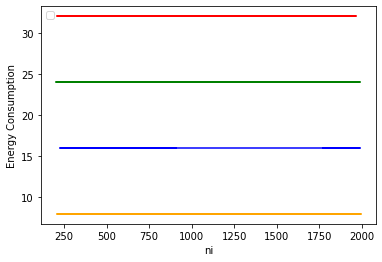

In [ ]:


upper = 30
middle = 20
lower = 10

x = np.array(x)
y = np.array(y)


supper = np.ma.masked_where(y < upper, y)
slower = np.ma.masked_where(y > lower, y)
smiddle1 = np.ma.masked_where((y < middle) | (y > upper), y)
smiddle2 = np.ma.masked_where((y < lower) | (y > middle), y)

fig, ax = plt.subplots()
ax.plot(x,smiddle1,color = 'green')
ax.plot(x,smiddle2,color = 'blue')
ax.plot(x,slower,color = 'orange')
ax.plot(x,supper,color = 'red')
ax.legend(loc = 'upper left')
plt.xlabel("ni")
plt.ylabel("Energy Consumption")
plt.show()
